# Predicting House Sale Prices

## Introduction

In this project, we build and iteratively improve upon a linear regression model to predict the sale prices of homes. We work with a dataset of 2930 residential property sales in Ames, Iowa between 2006 and 2010, with each data point containing information related to the quality and quantity of various physical attributes of the corresponding house. The dataset contains continuous variables related to the dimensions of the property, discrete variables related to the number of rooms and amenities and to dates of building and remodeling, and nominal and ordinal categorical variables identifying and rating various items or types of items within and about the property. A detailed description of the data and why it was collected can be found in this [article](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627), and a full data dictionary can be found in the supplemental material [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

Below, we build a machine learning pipeline of modular parts to transform and select the model features and to train and test the model(s) we will use to predict the house sale prices. This pipeline automates the workflow, allowing us to quickly iterate over different models as we develop and adjust them. Throughout the project, we refine our pipeline functions as we explore methods to optimize our models. This evolution of the workflow is illustrated explicitly below.

## Building the Pipeline Skeleton

We begin by building a skeleton of our machine learning pipeline, which will take our housing data as input, pass it through a series of functions to transform and select features and train and test the model, and output measures of the model's performance.

Before we start putting together the pipeline, let's get set up and take a quick look at our data.

In [52]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# read in dataset
houses = pd.read_csv('AmesHousing.tsv', sep='\t')

In [2]:
# explore dataset
pd.options.display.max_columns = 99
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Now we can prepare our pipeline skeleton. The pipeline will consist of three functions: `transform_features()`, which will perform feature engineering, `select_features()`, which will perform feature selection, and `train_and_test()`, which will perform model training and testing. 

For the first iteration of our pipeline, we will keep all three functions as simple as possible: the feature engineering function will return the training data unchanged; the feature selection function will return one feature variable and the target variable from the training data; and the model training and testing function will split the data in half into training and testing sets, fit a simple linear regression model to the training data, test the model on the test set, and return the root-mean-squared-error of the predictive model.

In [3]:
# first iteration of feature engineering function
def transform_features(df):
    return df

# first iteration of feature selection function
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

# first iteration of model training and testing function
def train_and_test(df, target):
    """
    Train and test linear regression model on data to 
    predict given target variable.
    
    Parameters
    ----------
    df: DataFrame
        Dataset on which to train and test model.
    target: str
        Column name of target variable.
        
    Returns
    -------
    float
        RMSE value of test prediction.
    """
    
    # split dataset into training and testing data
    train = df[:1460]
    test = df[1460:]
    
    # train model using all numerical columns except target
    sfdf = select_features(df)
    features = [col for col in sfdf.columns if
                (pd.api.types.is_numeric_dtype(sfdf[col]) and
                 col != target)]
    
    # instantiate model
    lr = LinearRegression()
    
    # fit model on training data
    lr.fit(train[features], train[target])
    
    # predict test data target
    predict = lr.predict(test[features])
    
    # calculate rmse
    rmse = np.sqrt(mean_squared_error(predict, test[target]))
    
    return rmse

In [4]:
train_and_test(houses, 'SalePrice')

57088.25161263909

## Feature Engineering

We can improve our predictive model by improving the quality of its features. This process of preparing, extracting, and transforming features from the raw data such that they better represent the underlying problem and thus improve predictive model performance is known as *feature engineering*. 

The `transform_features()` function will perform the feature engineering step of our pipeline by removing columns of no use to the analysis, either due to large percentages of missing values or to data leakage, transforming features into proper formats, i.e. scaling numerical values, converting types, handling missing values, etc., and combing features to create new ones.

Below, we explore the data further to investigate how we may best transform it. Then, we update our `transform_features()` function to perform the necessary transformations.

### Handling Missing Values

We begin the process of feature engineering by investigating the missing data in our dataset. Below we list the non-zero percentages of missing values in each column.

In [5]:
# copy dataframe for experimentation
houses_copy = houses.copy()
# view missing values
round((houses_copy.isnull().sum() / 
       houses.shape[0] * 100), 2)[houses.isnull().sum() > 0]

Lot Frontage      16.72
Alley             93.24
Mas Vnr Type       0.78
Mas Vnr Area       0.78
Bsmt Qual          2.73
Bsmt Cond          2.73
Bsmt Exposure      2.83
BsmtFin Type 1     2.73
BsmtFin SF 1       0.03
BsmtFin Type 2     2.76
BsmtFin SF 2       0.03
Bsmt Unf SF        0.03
Total Bsmt SF      0.03
Electrical         0.03
Bsmt Full Bath     0.07
Bsmt Half Bath     0.07
Fireplace Qu      48.53
Garage Type        5.36
Garage Yr Blt      5.43
Garage Finish      5.43
Garage Cars        0.03
Garage Area        0.03
Garage Qual        5.43
Garage Cond        5.43
Pool QC           99.56
Fence             80.48
Misc Feature      96.38
dtype: float64

Six of the columns ('Lot Frontage', 'Alley', 'Fireplace Qu', 'Pool QC', 'Fence', and 'Misc Feature') are missing significant fractions (nearly 17-100%) of their entries, while the rest of the columns containing null entries are only missing about 5% or fewer values. As a first iteration of our missing data transformation, we drop all columns with 15% or more null entries.

In [6]:
# drop columns with >= 15% missing entries
drop_cols = ((houses_copy.isnull().sum() / 
              houses.shape[0])[houses_copy.isnull().sum() / 
                               houses.shape[0] > 0.15]).index
houses_copy.drop(drop_cols, axis=1, inplace=True)

Then, we impute the remaining missing values in each column with the corresponding column' mode, or most popular value.

In [7]:
houses_copy.isnull().sum()[houses_copy.isnull().sum() > 0]

Mas Vnr Type       23
Mas Vnr Area       23
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin SF 1        1
BsmtFin Type 2     81
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
dtype: int64

In [8]:
# impute missing values with modes
impute_cols = houses_copy.isnull().sum()[
    houses_copy.isnull().sum() > 0].index
for col in impute_cols:
    houses_copy[col] = houses_copy[col].fillna(
        houses_copy[col].mode()[0])
# check no longer any missing values
houses_copy.isnull().sum().value_counts()

0    76
dtype: int64

### Creating New Features

The next step in our feature engineering process is to create new features that better represent the information contained in the dataset in a way that more closely relates to the predictions our models are attempting to make. A full designation of new features requires an in depth examination of the dataset and its documentation. For now, we will start by just introducing a few simple new features: 
- `Sale Age` = `Yr Sold` - `Year Built` = age of house at sale;
- `Remod Age` = `Year Remod/Add` - `Year Built` = age of house at remodel;
- `Remod Sale Age` = `Yr Sold` - `Year Remod/Add` = age of remodel at sale;
- `Total SF` = `Total Bsmt SF` + `Gr Liv Area` = total square footage.

In [9]:
# age at sale: 'Sale Age' = 'Yr Sold' - 'Year Built'
houses_copy['Sale Age'] = houses_copy['Yr Sold'] - houses_copy['Year Built']
# age at remodel: 'Remod Age' = 'Year Remod/Add' - 'Year Built'
houses_copy['Remod Age'] = houses_copy['Year Remod/Add'] - houses_copy['Year Built']
# remodel age at sale: 'Remod Sale Age' = 'Yr Sold' - 'Year Remod/Add'
houses_copy['Remod Sale Age'] = houses_copy['Yr Sold'] - houses_copy['Year Remod/Add']
# total area: 'Total SF' = 'Total Bsmt SF' + 'Gr Liv Area'
houses_copy['Total SF'] = houses_copy['Total Bsmt SF'] + houses_copy['Gr Liv Area']

Let's make sure to remove any rows containing negative values in the new columns we created, since these entries would represent nonsensical data (we cannot have negative ages or square footages).

In [10]:
# check for negative values in new columns
new_cols = ['Sale Age', 'Remod Age', 'Remod Sale Age', 'Total SF']
(houses_copy[new_cols] < 0).sum()

Sale Age          1
Remod Age         1
Remod Sale Age    3
Total SF          0
dtype: int64

In [11]:
# get set of row indices to remove
drop_rows = []
for col in new_cols:
    row_indices = list(houses_copy[houses_copy[col] < 0].index)
    for irow in row_indices:
        drop_rows.append(irow)
drop_rows = set(drop_rows)

In [12]:
# remove rows with negative values in new columns
houses_copy = houses_copy.drop(list(drop_rows), axis=0)

Finally, we can remove the redundant columns we replaced with our new features: `Year Built` and `Year Remod/Add`. For now, we retain the other three columns used to build our new features (`Yr Sold`, `Total Bsmt SF`, and `Gr Liv Area`), since they may still provide relevant predictive power on their own.

In [13]:
houses_copy.drop(['Year Built', 'Year Remod/Add'], axis=1, inplace=True)

### Removing Additional Attributes

The last step to engineer our features is to drop additional columns that are either not useful for our machine learning model or that leak data about the final sale price.

In [14]:
# drop columns not useful for ML
houses_copy.drop(['PID', 'Order'], axis=1, inplace=True)

# drop columns with data leakage
houses_copy.drop(['Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition'],
                 axis=1, inplace=True)

### Updating the Pipeline

Let's now update the feature transformation function in our pipeline to reflect the determinations made above.

In [15]:
# second iteration of feature engineering function
def transform_features(df):
    """
    Transform features (handle missing values, create new
    features, drop columns) prior to building model.
    
    Parameters
    ----------
    df: DataFrame
        Dataset with features to engineer.
        
    Returns
    -------
    DataFrame
        Dataset with transformed features.
    """
    
    # drop columns with >= 15% missing entries
    drop_cols = ((df.isnull().sum() / df.shape[0])
                 [df.isnull().sum() / df.shape[0] > 0.15]).index
    df = df.drop(drop_cols, axis=1)
    
    # impute missing values with modes
    impute_cols = df.isnull().sum()[df.isnull().sum() > 0].index
    for col in impute_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
        
    # create new features
    df['Sale Age'] = df['Yr Sold'] - df['Year Built']
    df['Remod Age'] = df['Year Remod/Add'] - df['Year Built']
    df['Remod Sale Age'] = df['Yr Sold'] - df['Year Remod/Add']
    df['Total SF'] = df['Total Bsmt SF'] + df['Gr Liv Area']
    
    # remove rows with negative values in new columns
    drop_rows = []
    new_cols = ['Sale Age', 'Remod Age', 'Remod Sale Age', 'Total SF']
    for col in new_cols:
        row_indices = list(df[df[col] < 0].index)
        for irow in row_indices:
            drop_rows.append(irow)
    drop_rows = set(drop_rows)
    df = df.drop(list(drop_rows), axis=0)
    
    # remove unnecessary features
    df = df.drop(['Year Built', 'Year Remod/Add', 'PID', 
                  'Order', 'Mo Sold', 'Yr Sold', 
                  'Sale Type', 'Sale Condition'], axis=1)
    
    return df


def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]


def train_and_test(df, target):
    """
    Train and test linear regression model on data to 
    predict given target variable.
    
    Parameters
    ----------
    df: DataFrame
        Dataset on which to train and test model.
    target: str
        Column name of target variable.
        
    Returns
    -------
    float
        RMSE value of test prediction.
    """
    
    # split dataset into training and testing data
    train = df[:1460]
    test = df[1460:]
    
    # train model using all numerical columns except target
    sfdf = select_features(df)
    features = [col for col in sfdf.columns if
                (pd.api.types.is_numeric_dtype(sfdf[col]) and
                 col != target)]
    
    # instantiate model
    lr = LinearRegression()
    
    # fit model on training data
    lr.fit(train[features], train[target])
    
    # predict test data target
    predict = lr.predict(test[features])
    
    # calculate rmse
    rmse = np.sqrt(mean_squared_error(predict, test[target]))
    
    return rmse

In [16]:
houses_v1 = houses.copy()
tf_houses = transform_features(houses_v1)
train_and_test(tf_houses, 'SalePrice')

55284.62277814025

## Feature Selection

Now that we've performed the necessary feature cleaning and transformations, we can move on to selecting the most appropriate features for use in our model. Feature selection is the process of identifying the best set of features that will optimize the model with minimal complexity. 

### Numerical Feature Selection

In [17]:
# get numeric training data columns
numeric_features = [col for col in tf_houses.columns if
                    pd.api.types.is_numeric_dtype(tf_houses[col])]

# generate correlation matrix
corr_mat = abs(tf_houses[numeric_features]
               .corr()['SalePrice']).sort_values(ascending=False)
print(corr_mat)

SalePrice          1.000000
Total SF           0.808311
Overall Qual       0.801212
Gr Liv Area        0.717617
Garage Cars        0.648351
Total Bsmt SF      0.644023
Garage Area        0.641414
1st Flr SF         0.635183
Sale Age           0.558984
Full Bath          0.546108
Remod Sale Age     0.534972
Mas Vnr Area       0.507010
TotRms AbvGrd      0.498614
Fireplaces         0.474994
Garage Yr Blt      0.442196
BsmtFin SF 1       0.439365
Wood Deck SF       0.328158
Open Porch SF      0.316277
Half Bath          0.284974
Bsmt Full Bath     0.276214
2nd Flr SF         0.269707
Lot Area           0.267517
Remod Age          0.240017
Bsmt Unf SF        0.182862
Bedroom AbvGr      0.143902
Enclosed Porch     0.128656
Kitchen AbvGr      0.119743
Screen Porch       0.112310
Overall Cond       0.101498
MS SubClass        0.085056
Pool Area          0.068445
Low Qual Fin SF    0.037620
Bsmt Half Bath     0.035852
3Ssn Porch         0.032279
Misc Val           0.019264
BsmtFin SF 2       0

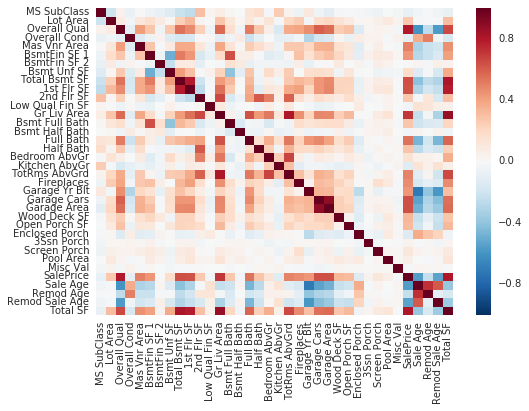

In [18]:
# generate heatmap
import seaborn as sns
sns.heatmap(tf_houses[numeric_features].corr())

Based on the correlation matrix and heatmap generated above, we see the following features correlate most strongly with the target column, in descending order:
1. total square footage (`Total SF`);
2. overall quality (`Overall Qual`);
3. above ground living area (`Gr Liv Area`);
4. garage size, in car capacity (`Garag Cars`);
5. total basement square footage (`Total Bsmt SF`);
6. garage square footage (`Garage Area`);
7. first floor square footage (`1st Flr SF`);
8. age of home at time of sale (`Sale Age`);
9. number of full baths (`Full Bath`);
10. age of remodel at time of sale (`Remod Sale Age`).

We'll retain the above top ten correlated numerical features for now and drop the rest.

### Categorical Feature Selection

Next, let's investigate which categorical variables we should consider for our model. When considering which categorical variables to include, we want to choose those with only a few unique values, to avoid large complexity in our model, and with some measure of variance between those values, to provide our model with some variability to capture when learning from our features. 

Additionally, some of the variables that represent categorical data may still be in numerical form at this point and will therefore need to be converted, i.e. if the numbers represented within do not hold any semantic meaning.

From the documentation provided with our data set, the following features represent categorical data:
- `MS SubClass`: dwelling type;
- `MS Zoning`: zoning classification;
- `Street`: type of road access;
- `Lot Shape`: shape of property;
- `Land Contour`: flatness of property;
- `Utilities`: type of utilities available;
- `Lot Config`: lot configuration;
- `Land Slope`: slope of property;
- `Neighborhood`: neighborhood in which property lies;
- `Condition1`: proximity to various conditions;
- `Condition2`: proximity to various conditions (if more than one);
- `BldgType`': type of dwelling;
- `House Style`': style of dwelling;
- `Overall Qual`: rating of overall material and finish;
- `Overall Cond`: rating of overall condition;
- `Roof Style`: type of roof;
- `Roof Matl`: root material;
- `Exterior 1st`: exterior covering;
- `Exterior 2nd`: exterior covering (if more than one);
- `Mas Vnr Type`: masonry veneer type;
- `Exter Qual`: evaluation of quality of material on exterior;
- `Exter Cond`: evaluation of present condition of material on exterior;
- `Foundation`: foundation type;
- `Bsmt Qual`: evaluation of quality of basement based on height;
- `Bsmt Cond`: evaluation of general condition of basement;
- `Bsmt Exposure`: walkout or garden level walls;
- `BsmtFin Type 1`: rating of basement finished area;
- `BsmtFin Type 2`: rating of basement finished area (if more than one type);
- `Heating`: heating type;
- `Heating QC`: heating quality and condition;
- `Central Air`: central air conditioning;
- `Electrical`: electrical system;
- `Kitchen Qual`: kitchen quality;
- `Functional`: home functionality;
- `Garage Type`: garage location;
- `Garage Finish`: interior finish of garage;
- `Garage Qual`: garage quality;
- `Garage Cond`: garage condition;
- `Paved Drive`: paved driveway.

Let's take a look at the unique values within each of the above categorical features.

In [19]:
# view number of unique values in categorical columns
cat_cols = ['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 
            'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 
            'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
            'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style',
            'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
            'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 
            'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
            'Heating', 'Heating QC', 'Central Air', 'Electrical',
            'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish',
            'Garage Qual', 'Garage Cond', 'Paved Drive']
tf_houses[cat_cols].nunique()

MS SubClass       16
MS Zoning          7
Street             2
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      28
Condition 1        9
Condition 2        8
Bldg Type          5
House Style        8
Overall Qual      10
Overall Cond       9
Roof Style         6
Roof Matl          8
Exterior 1st      16
Exterior 2nd      17
Mas Vnr Type       5
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          5
Bsmt Cond          5
Bsmt Exposure      4
BsmtFin Type 1     6
BsmtFin Type 2     6
Heating            6
Heating QC         5
Central Air        2
Electrical         5
Kitchen Qual       5
Functional         8
Garage Type        6
Garage Finish      3
Garage Qual        5
Garage Cond        5
Paved Drive        3
dtype: int64

For simplicity, let's exclude all categorical columns with more than ten unique values.

In [20]:
# keep categorical features with 10 or fewer unique values
categorical_features = [col for col in cat_cols if 
                        tf_houses[col].nunique() <= 10]
print(categorical_features)

['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Roof Matl', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive']


Next, let's remove any categorical columns with low variance, where any individual unique value consitutes 95% or more of the overall entries in the column.

In [21]:
# find low variance categorical features
low_var_cf = []
for cf in categorical_features:
    if tf_houses[cf].value_counts()[
       tf_houses[cf].value_counts() / 
       tf_houses[cf].size * 100 > 95].any():
        low_var_cf.append(cf)
print(low_var_cf)

['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Garage Cond']


In [22]:
# remove low variance features
categorical_features = [cf for cf in categorical_features if 
                        cf not in low_var_cf]
print(categorical_features)

['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Condition 1', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Paved Drive']


Finally, let's convert our categorical columns to the categorical type. From here, we can create dummy variables for each category within each column.

In [23]:
# convert categorical features to category type
tf_houses_copy = tf_houses.copy()
for cf in categorical_features:
    tf_houses_copy[cf] = tf_houses_copy[cf].astype('category')

In [24]:
# create dummy columns, add to dataframe, and remove old columns
for cf in categorical_features:
    cf_dummies = pd.get_dummies(tf_houses_copy[cf])
    tf_houses_copy = pd.concat([tf_houses_copy, cf_dummies], axis=1)
    del tf_houses_copy[cf]

### Updating the Pipeline again...

Now let's put it all together and update our feature selection function in our pipeline.

In [25]:
nf = [col for col in tf_houses.columns if pd.api.types.is_numeric_dtype(tf_houses[col])]
list(abs(tf_houses[nf].corr()['SalePrice']).sort_values(ascending=False)[:10].index)

['SalePrice',
 'Total SF',
 'Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Total Bsmt SF',
 'Garage Area',
 '1st Flr SF',
 'Sale Age',
 'Full Bath']

In [26]:
# second iteration of feature engineering function
def transform_features(df):
    """
    Transform features (handle missing values, create new
    features, drop columns) prior to building model.
    
    Parameters
    ----------
    df: DataFrame
        Dataset with features to engineer.
        
    Returns
    -------
    DataFrame
        Dataset with transformed features.
    """
    
    # drop columns with >= 15% missing entries
    drop_cols = ((df.isnull().sum() / df.shape[0])
                 [df.isnull().sum() / df.shape[0] > 0.15]).index
    df = df.drop(drop_cols, axis=1)
    
    # impute missing values with modes
    impute_cols = df.isnull().sum()[df.isnull().sum() > 0].index
    for col in impute_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
        
    # create new features
    df['Sale Age'] = df['Yr Sold'] - df['Year Built']
    df['Remod Age'] = df['Year Remod/Add'] - df['Year Built']
    df['Remod Sale Age'] = df['Yr Sold'] - df['Year Remod/Add']
    df['Total SF'] = df['Total Bsmt SF'] + df['Gr Liv Area']
    
    # remove rows with negative values in new columns
    drop_rows = []
    new_cols = ['Sale Age', 'Remod Age', 'Remod Sale Age', 'Total SF']
    for col in new_cols:
        row_indices = list(df[df[col] < 0].index)
        for irow in row_indices:
            drop_rows.append(irow)
    drop_rows = set(drop_rows)
    df = df.drop(list(drop_rows), axis=0)
    
    # remove unnecessary features
    df = df.drop(['Year Built', 'Year Remod/Add', 'PID', 
                  'Order', 'Mo Sold', 'Yr Sold', 
                  'Sale Type', 'Sale Condition'], axis=1)
    
    return df


def select_features(df):
    """
    Select features for model.
    
    Parameters
    ----------
    df: DataFrame
        Dataset with features to select.
        
    Returns
    -------
    DataFrame
        Dataset with selected features.
    """
    
    # drop numeric columns outside of top 10 in correlation matrix
    selected = []
    nf = [col for col in df.columns if 
          pd.api.types.is_numeric_dtype(df[col])]
    selected += list(abs(tf_houses[nf].corr()['SalePrice'])
                     .sort_values(ascending=False)[:10].index)
    
    # drop categorical columns with more than 10 unique values 
    cf = ['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape',
          'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
          'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
          'House Style', 'Roof Style', 'Overall Qual', 'Overall Cond',
          'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
          'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 
          'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
          'Heating', 'Heating QC', 'Central Air', 'Electrical',
          'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish',
          'Garage Qual', 'Garage Cond', 'Paved Drive']
    cf = [col for col in cf if df[col].nunique() <= 10 and
          col not in selected]
    
    # drop categorical columns with low variance (any unique values that constitute at least 95% of entries)
    low_var_cf = []
    for col in cf:
        if df[col].value_counts()[df[col].value_counts() / 
                                  df[col].size * 100 > 95].any():
            low_var_cf.append(cf)
    cf = [col for col in cf if col not in low_var_cf]
    selected += cf
    selected.append('SalePrice')
    
    df_copy = df[selected].copy()
    
    # convert categorical features to category types and dummy code
    for col in cf:
        df_copy[col] = df_copy[col].astype('category')
        cf_dummies = pd.get_dummies(df_copy[col])
        df_copy = pd.concat([df_copy, cf_dummies], axis=1)
        del df_copy[col]
        
    # remove categorical features that don't correlate well...
    
    return df_copy


def train_and_test(df, target):
    """
    Train and test linear regression model on data to 
    predict given target variable.
    
    Parameters
    ----------
    df: DataFrame
        Dataset on which to train and test model.
    target: str
        Column name of target variable.
        
    Returns
    -------
    float
        RMSE value of test prediction.
    """
    
    # split dataset into training and testing data
    train = df[:1460]
    test = df[1460:]
    
    # train model using all numerical columns except target
    features = [col for col in df.columns if
                (pd.api.types.is_numeric_dtype(df[col]) and
                 col != target)]
    
    # instantiate model
    lr = LinearRegression()
    
    # fit model on training data
    lr.fit(train[features], train[target])
    
    # predict test data target
    predict = lr.predict(test[features])
    
    # calculate rmse
    rmse = np.sqrt(mean_squared_error(predict, test[target]))
    
    return rmse

In [27]:
houses_v2 = houses.copy()
tf_houses = transform_features(houses_v2)
sf_houses = select_features(tf_houses)
train_and_test(sf_houses, 'SalePrice')

1267885976096.3364

## Training and Testing

Finally, we update the training and testing function to take an input parameter dictating which type of validation to perform.

In [58]:
def train_and_test(df, target, k=0):
    """
    Train and test linear regression model on data to 
    predict given target variable.
    
    Parameters
    ----------
    df: DataFrame
        Dataset on which to train and test model.
    target: str
        Column name of target variable.
    k : int
        The number of folds for k-fold cross validation.
        
    Returns
    -------
    float
        RMSE value of test prediction.
    """
 
    # train model using all numerical columns except target
    features = [col for col in df.columns if
                (pd.api.types.is_numeric_dtype(df[col]) and  
                 col != target)]
    # instantiate model
    lr = LinearRegression()
    
    # holdout validation
    if k == 0:
    
        # split dataset into training and testing data
        train = df[:1460]
        test = df[1460:]
    
        # fit model on training data
        lr.fit(train[features], train[target])
    
        # predict test data target
        predict = lr.predict(test[features])
    
        # calculate rmse
        rmse = np.sqrt(mean_squared_error(predict, test[target]))
    
    # simple cross validation
    elif k == 1:
        
        # shuffle order
        df = df.sample(frac=1)
        
        # split dataset into folds
        fold_one = df[:1460]
        fold_two = df[1460:]
    
        # fit model on fold one and test on fold two
        lr.fit(fold_one[features], fold_one[target])
        predict_one = lr.predict(fold_two[features])
    
        # fit model on fold two and test on fold one
        lr.fit(fold_two[features], fold_two[target])
        predict_two = lr.predict(fold_one[features])
        
        # computer average rmse
        rmse_one = np.sqrt(mean_squared_error(predict_one, 
                                              fold_two[target]))
        rmse_two = np.sqrt(mean_squared_error(predict_two,
                                              fold_one[target]))
        rmse = np.mean([rmse_one, rmse_two])
        
    # k-fold cross validation
    else:
        
        # shuffle order (?)
        df = df.sample(frac=1)
        
        # split dataset into k folds
        kf = KFold(n_splits=k, shuffle=True)
        
        # loop over folds
        rmse_list = []
        for train_index, test_index in kf.split(df):
            
            # select training and test sets
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            
            # fit and test model
            lr.fit(train[features], train[target])
            predict = lr.predict(test[features])
            
            # compute rmse
            rmse_list.append(np.sqrt(mean_squared_error(predict,
                                                        test[target])))
        
        # calcualte average rmse
        rmse = np.mean(rmse_list)         
    
    return rmse

In [60]:
train_and_test(sf_houses, 'SalePrice', 5)

598505934252.7665